<a href="https://colab.research.google.com/github/saranyasekars/ML/blob/main/Stock_Prediction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction Using Python & Machine Learning**


In [4]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [62]:
df = yf.download('PLTR',start='2013-01-01',end='2025-02-05')

[*********************100%***********************]  1 of 1 completed


In [63]:
df.Close

Ticker,PLTR
Date,
2020-09-30,9.500000
2020-10-01,9.460000
2020-10-02,9.200000
2020-10-05,9.030000
2020-10-06,9.900000
...,...
2025-01-29,79.760002
2025-01-30,81.220001
2025-01-31,82.489998


In [64]:
df.shape

(1092, 5)

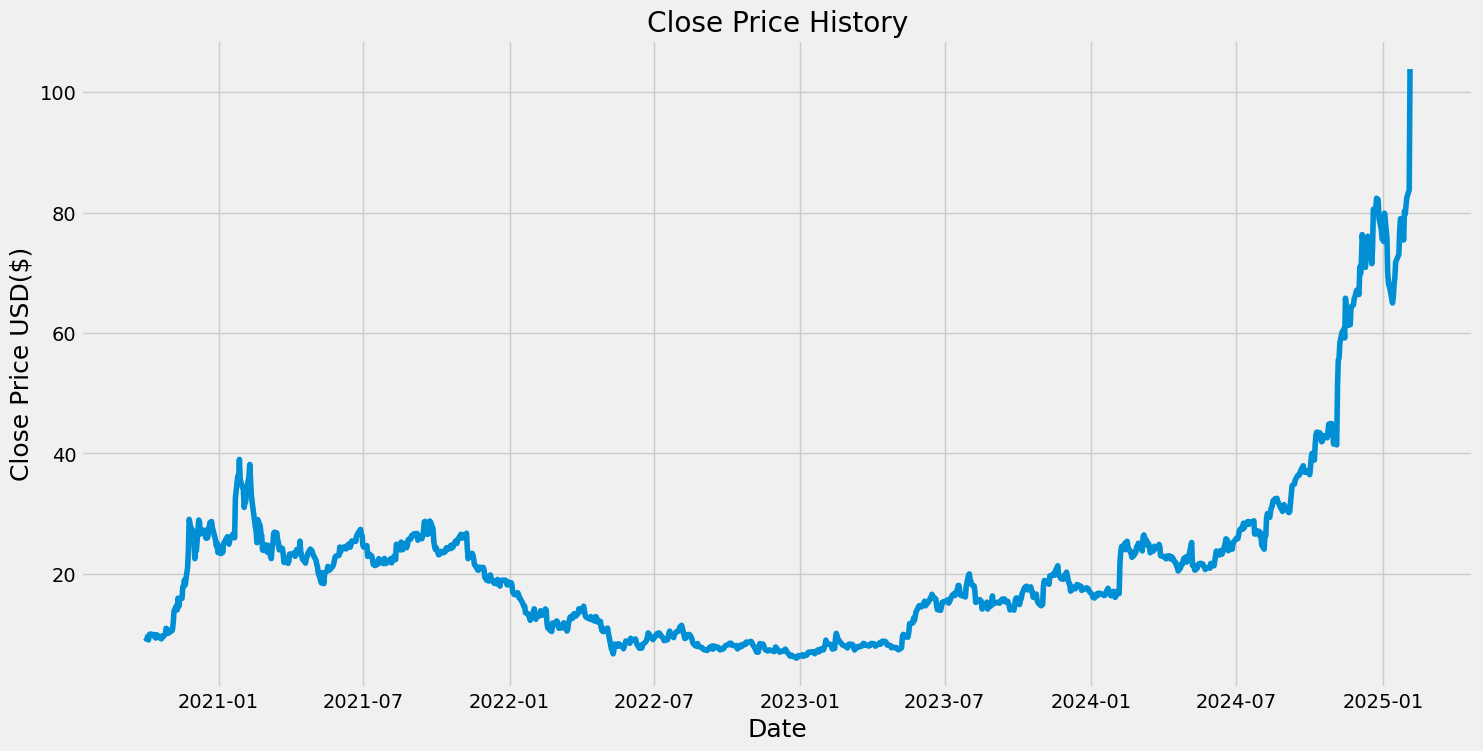

In [65]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [66]:
data=df['Close']
print('data',data)
dataset=data.values
print('dataset::',dataset)
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

data Ticker            PLTR
Date                  
2020-09-30    9.500000
2020-10-01    9.460000
2020-10-02    9.200000
2020-10-05    9.030000
2020-10-06    9.900000
...                ...
2025-01-29   79.760002
2025-01-30   81.220001
2025-01-31   82.489998
2025-02-03   83.739998
2025-02-04  103.830002

[1092 rows x 1 columns]
dataset:: [[  9.5       ]
 [  9.46000004]
 [  9.19999981]
 ...
 [ 82.48999786]
 [ 83.73999786]
 [103.83000183]]


array([[0.03577635],
       [0.03536747],
       [0.0327098 ],
       ...,
       [0.78186647],
       [0.79464373],
       [1.        ]])

In [67]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]


for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.03577635, 0.03536747, 0.0327098 , 0.03097209, 0.03986507,
       0.04088725, 0.04088725, 0.04037616, 0.03976286, 0.03546969,
       0.03414086, 0.03996729, 0.03792293, 0.03649187, 0.03342533,
       0.0327098 , 0.03761628, 0.03567413, 0.04037616, 0.05059797,
       0.0495758 , 0.04855361, 0.04221609, 0.04640703, 0.04599816,
       0.04824696, 0.06010426, 0.0800368 , 0.08862312, 0.08177451,
       0.10180926, 0.08770316, 0.10017377, 0.10150261, 0.12112849,
       0.12163957, 0.13267913, 0.12419503, 0.15373608, 0.18215271,
       0.23561279, 0.22140447, 0.21578248, 0.20106307, 0.16876214,
       0.1842993 , 0.18245937, 0.2344884 , 0.23091076, 0.210876  ,
       0.21506696, 0.21670245, 0.21711131, 0.20883165, 0.20361852,
       0.21700909, 0.2041296 , 0.23009302, 0.22528877, 0.23193295])]
[0.2223244361945395]



In [68]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(814, 60)

In [69]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(814, 60, 1)

In [70]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
#copile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [72]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

814/814 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0011


In [74]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [75]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [76]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [77]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

4.6777513098241785

train:: Ticker           PLTR
Date                 
2020-09-30   9.500000
2020-10-01   9.460000
2020-10-02   9.200000
2020-10-05   9.030000
2020-10-06   9.900000
...               ...
2024-03-15  23.490000
2024-03-18  24.000000
2024-03-19  23.799999
2024-03-20  24.570000
2024-03-21  24.490000

[874 rows x 1 columns]


<ipython-input-79-7efe156d629e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


KeyError: 'Close'

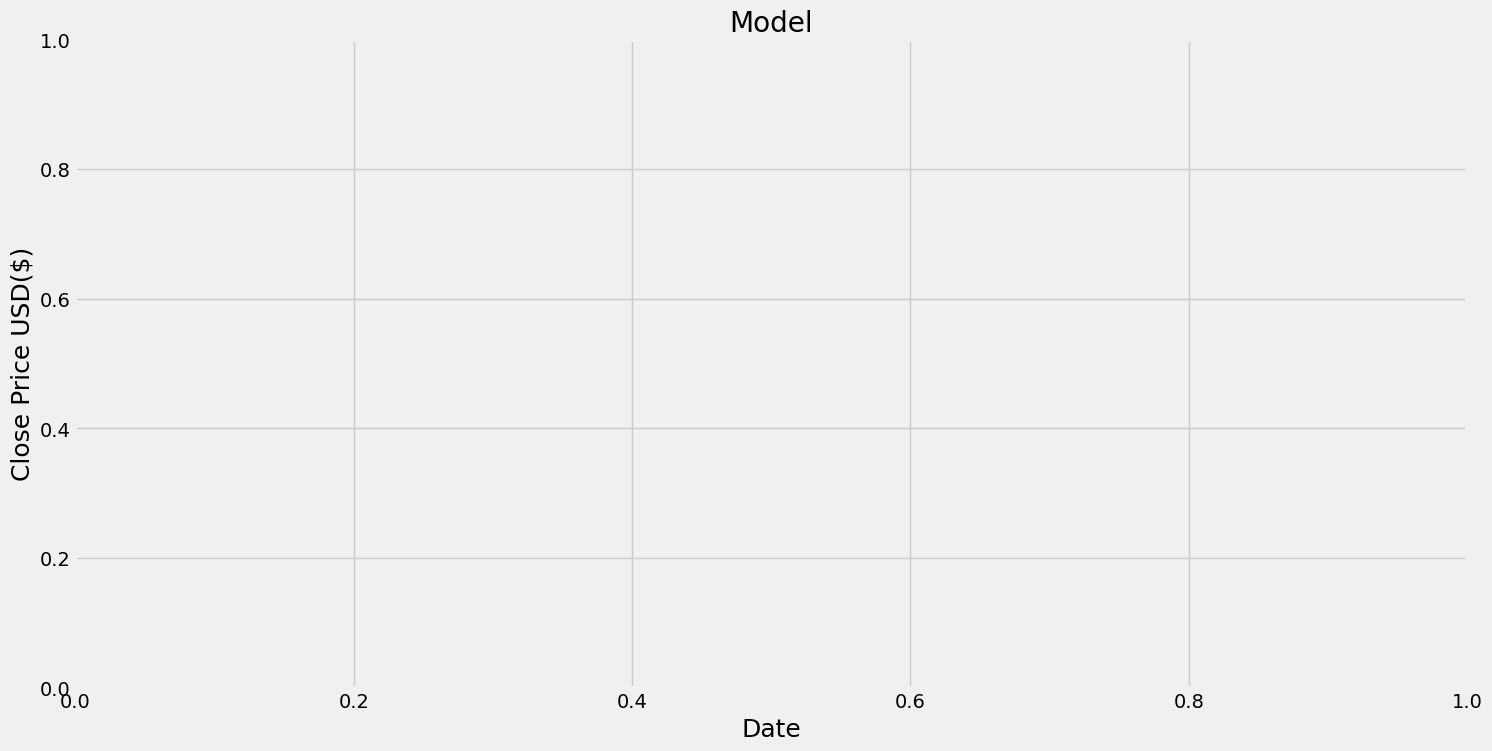

In [79]:
train=data[:training_data_len]
print('train::',train)
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [80]:
#show the valid and predicted prices
valid

Ticker,PLTR,Predictions
Date,,
2024-03-22,24.180000,24.573584
2024-03-25,24.510000,24.555767
2024-03-26,24.889999,24.586599
2024-03-27,24.510000,24.688877
2024-03-28,23.010000,24.762806
...,...,...
2025-01-29,79.760002,71.475220
2025-01-30,81.220001,72.353561
2025-01-31,82.489998,73.200287


In [83]:
#Get the quote
apple_quote=yf.download('PLTR',start='2013-01-01',end='2025-02-05')
#create a new dataframe
new_df=apple_quote['Close']
#get the last 60 day closing price values and convert the dataframe to an array
last_180days=new_df[-180:].values
#scale the data to be values between 0 and 1
last_180days_scaled=scaler.transform(last_180days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_180days_scaled)
#convert the X_test data to a numpy array
X_test=np.array(X_test)
#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[78.41599]]


In [85]:
#Get the quote
apple_quote2=yf.download('PLTR',start='2025-02-06',end='2025-02-06')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PLTR']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2025-02-06 -> 2025-02-06) (Yahoo error = "Data doesn\'t exist for startDate = 1738818000, endDate = 1738818000")')


Empty DataFrame
Columns: [PLTR]
Index: []


In [ ]:
from google.colab import drive
drive.mount('/content/drive')